<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/1.MNIST_samplecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as opt
from torchvision import datasets, transforms

In [2]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')#
print(device)

cpu


In [4]:
# MNIST 데이터셋
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [5]:
print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=4,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=4,
                                          shuffle=False)

torch.Size([4, 1, 28, 28])
torch.Size([4])
tensor([6, 7, 9, 1])
torch.Size([28, 28])
tensor(6)


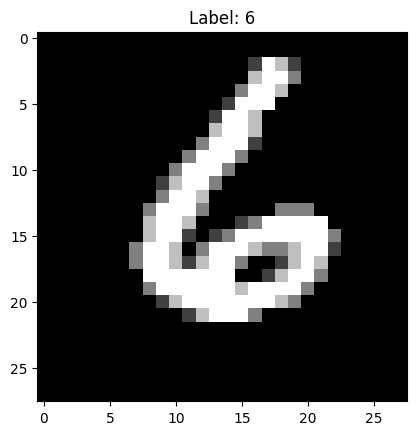

In [13]:
images, labels = next(iter(train_loader))
print(images.shape)# b,c,h,w
print(labels.shape)
print(labels)

import matplotlib.pyplot as plt
img = images[0].squeeze()
print(img.shape)

label = labels[0]
print(label)

plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [12]:
import matplotlib.pyplot as plt
img = images[0].squeeze()
print(img.shape)

torch.Size([28, 28])


torch.Size([4, 1, 28, 28])
torch.Size([4])


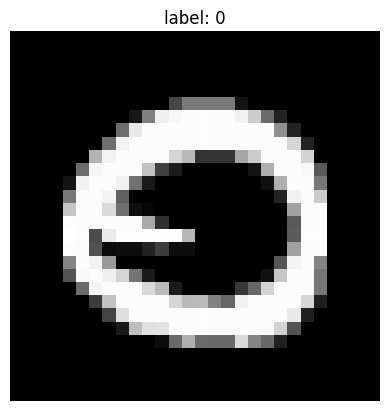

torch.Size([1, 28, 28])
torch.Size([28, 1, 28])


In [16]:
images, labels = next(iter(train_loader))

print(images.shape) # b,c,h,w
print(labels.shape)

import matplotlib.pyplot as plt

img = images[0].squeeze()
label = labels[0]

plt.imshow(img,cmap='gray')
plt.title(f'label: {label.item()}')
plt.axis('off')
plt.show()

print(img.unsqueeze(0).shape)
print(img.unsqueeze(1).shape)

#MLP(다층 퍼셉트론) 신경망

In [17]:
# MLP 모델
class MLP(nn.Module):
    #input_size 입력층,
    # 은닉층1
    # 은닉층2
    # 3개층으로 구성
    def __init__(self, input_size, hidden_size, num_cls):
        super(MLP, self).__init__()
        # self.block1 = nn.Sequential(
        #     nn.Linear(input_size, hidden_size),
        #     nn.ReLU(),
        #     nn.Linear(hidden_size, num_cls)
        # )
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # self.linear2 = nn.Linear(hidden_size, num_cls)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()

        # self.output = nn.Softmax(dim=1)
        self.output = nn.Linear(hidden_size, num_cls)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu2(x)
        out = self.output(x)

        return out

In [23]:
input_size = 784 #28*28
hidden_size = 500
num_cls = 10
epochs = 3

model = MLP(input_size, hidden_size, num_cls).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=0.001)

# 학습
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 데이터를 디바이스로 이동
        images = images.reshape(-1, input_size).to(device)
        # images = images.to(device)
        labels = labels.to(device)

        # 모델을 셀행
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # 역전파 & 옵티마이저
        optimizer.zero_grad()# 기울기가 있었으면 기울기를 초기화 시켜줌
        loss.backward()# 뒤로 백 프로파게이션 할 준비
        optimizer.step()# 웨이트를 업데이트

#        print(f"Epoch {epoch}, loss: {loss}")
        if(i+1)%100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
        # Forward

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2, loss: 0.00016275831148959696
Epoch 2, loss: 4.887537215836346e-06
Epoch 2, loss: 3.59688165190164e-05
Epoch 2, loss: 0.01853013224899769
Epoch 2, loss: 4.711519432021305e-05
Epoch 2, loss: 0.06519582122564316
Epoch 2, loss: 4.773879481945187e-05
Epoch 2, loss: 0.0012472127564251423
Epoch 2, loss: 0.2280079871416092
Epoch 2, loss: 3.4868589864345267e-06
Epoch 2, loss: 2.9802320611338473e-08
Epoch 2, loss: 0.0001746999769238755
Epoch 2, loss: 0.007768123410642147
Epoch 2, loss: 0.049280114471912384
Epoch 2, loss: 0.0
Epoch 2, loss: 0.36307013034820557
Epoch 2, loss: 2.7088843125966378e-05
Epoch 2, loss: 0.0
Epoch 2, loss: 0.0012078264262527227
Epoch 2, loss: 5.364413482311647e-07
Epoch 2, loss: 0.14742006361484528
Epoch 2, loss: 0.0
Epoch 2, loss: 0.00013807008508592844
Epoch 2, loss: 0.01236702874302864
Epoch 2, loss: 0.00021366443252190948
Epoch 2, loss: 0.0001660046837059781
Epoch 2, loss: 0.0020103207789361477
Epoch 2, loss: 6.854528464828

In [20]:
print(model)

MLP(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=512, out_features=10, bias=True)
)


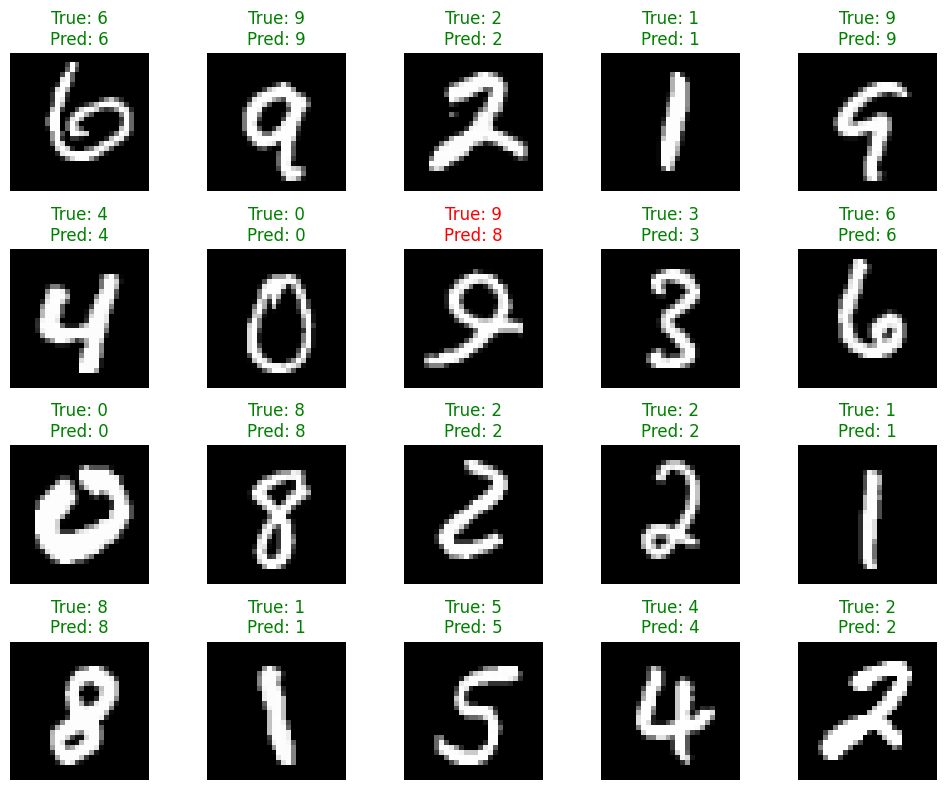

In [25]:
# prompt: 테스트 셋에서 20개정도 샘플을 추출해서 결과를 표시해

import matplotlib.pyplot as plt
import numpy as np

# 테스트 셋에서 20개 샘플 추출
sample_indices = np.random.choice(len(test_dataset), 20, replace=False)
sampled_images = [test_dataset[i][0] for i in sample_indices]
sampled_labels = [test_dataset[i][1] for i in sample_indices]

# 모델 예측
model.eval()  # 평가 모드로 설정
predicted_labels = []
with torch.no_grad():
  for image in sampled_images:
    image = image.reshape(-1, input_size).to(device)
    image = image.to(device)
    output = model(image).argmax()
    predicted_labels.append(output.item())

# 결과 시각화
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(sampled_images[i].squeeze().numpy(), cmap='gray')
  ax.set_title(f'True: {sampled_labels[i]}\nPred: {predicted_labels[i]}',
               color='green' if sampled_labels[i] == predicted_labels[i] else 'red')
  ax.axis('off')
plt.tight_layout()
plt.show()

#CNN

In [35]:
class CNN(nn.Module):
    def __init__(self, input_ch, hidden_size, num_cls):
        super(CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(input_ch, hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)

        )
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_size, hidden_size, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(hidden_size, input_ch, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.flatten = nn.Flatten()
        # self.output = nn.Linear(hidden_size, num_cls)
        self.output = nn.Linear(784, num_cls)# 퍼셉트론

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = self.flatten(x)
        out = self.output(x)

        return out


In [36]:
# input_size = 784 #28*28
# hidden_size = 500
# num_cls = 10
epochs = 3
#input_ch, hidden_size, num_cls
model_cnn = CNN(1, 16, 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model_cnn.parameters(), lr=0.001)

# 학습
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 데이터를 디바이스로 이동
        # images = images.reshape(-1, input_size).to(device)
        images = images.to(device)
        labels = labels.to(device)

        # 모델을 셀행
        outputs = model_cnn(images).squeeze()
        loss = loss_fn(outputs, labels)

        # 역전파 & 옵티마이저
        optimizer.zero_grad()# 기울기가 있었으면 기울기를 초기화 시켜줌
        loss.backward()# 뒤로 백 프로파게이션 할 준비
        optimizer.step()# 웨이트를 업데이트

        if(i+1)%100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

Epoch [1/3], Step [100/15000], Loss: 0.6862
Epoch [1/3], Step [200/15000], Loss: 0.4251
Epoch [1/3], Step [300/15000], Loss: 0.8764
Epoch [1/3], Step [400/15000], Loss: 0.2466
Epoch [1/3], Step [500/15000], Loss: 0.2813
Epoch [1/3], Step [600/15000], Loss: 0.0346
Epoch [1/3], Step [700/15000], Loss: 1.5210
Epoch [1/3], Step [800/15000], Loss: 0.1283
Epoch [1/3], Step [900/15000], Loss: 0.8986
Epoch [1/3], Step [1000/15000], Loss: 0.1300
Epoch [1/3], Step [1100/15000], Loss: 0.0479
Epoch [1/3], Step [1200/15000], Loss: 0.0455
Epoch [1/3], Step [1300/15000], Loss: 0.9295
Epoch [1/3], Step [1400/15000], Loss: 0.8371
Epoch [1/3], Step [1500/15000], Loss: 0.3777
Epoch [1/3], Step [1600/15000], Loss: 0.7020
Epoch [1/3], Step [1700/15000], Loss: 0.0793
Epoch [1/3], Step [1800/15000], Loss: 0.5570
Epoch [1/3], Step [1900/15000], Loss: 0.1240
Epoch [1/3], Step [2000/15000], Loss: 0.0393
Epoch [1/3], Step [2100/15000], Loss: 1.0123
Epoch [1/3], Step [2200/15000], Loss: 0.1802
Epoch [1/3], Step [

In [37]:
print(model_cnn)

CNN(
  (block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block3): Sequential(
    (0): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (output): Linear(in_features=784, out_features=10, bias=True)
)


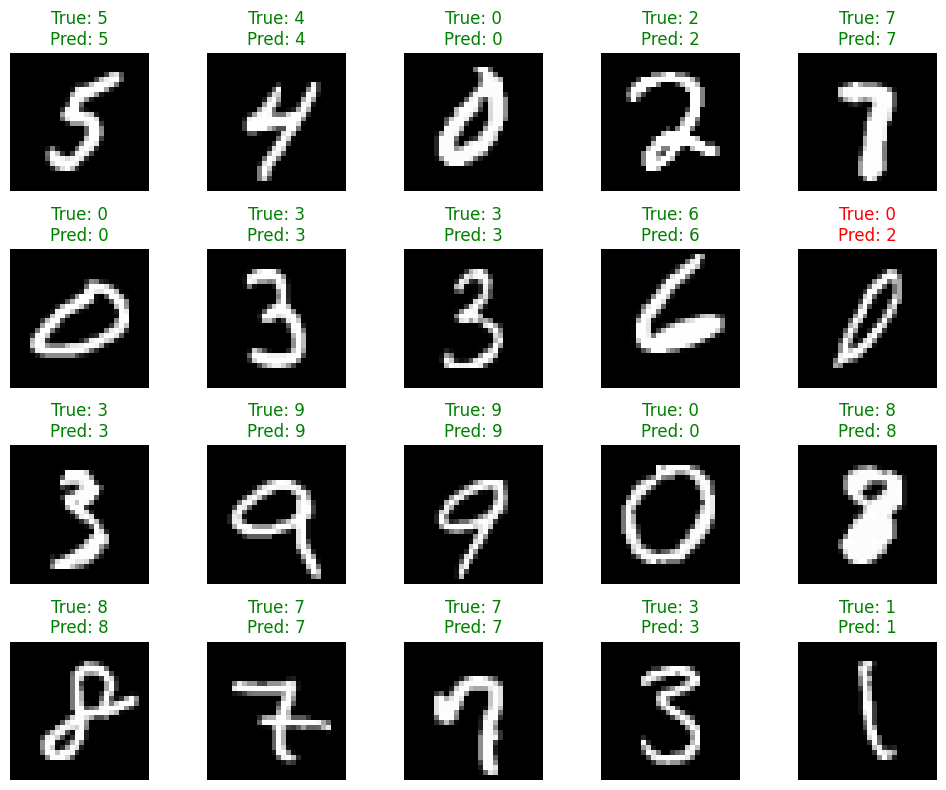

In [39]:
# prompt: 테스트 셋에서 20개정도 샘플을 추출해서 결과를 표시해

import matplotlib.pyplot as plt
import numpy as np

# 테스트 셋에서 20개 샘플 추출
sample_indices = np.random.choice(len(test_dataset), 20, replace=False)
sampled_images = [test_dataset[i][0] for i in sample_indices]
sampled_labels = [test_dataset[i][1] for i in sample_indices]

# 모델 예측
model_cnn.eval()  # 평가 모드로 설정
predicted_labels = []
with torch.no_grad():
  for image in sampled_images:
    # image = image.reshape(-1, input_size).to(device)
    image = image.to(device)
    output = model_cnn(image).argmax()
    predicted_labels.append(output.item())

# 결과 시각화
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(sampled_images[i].squeeze().numpy(), cmap='gray')
  ax.set_title(f'True: {sampled_labels[i]}\nPred: {predicted_labels[i]}',
               color='green' if sampled_labels[i] == predicted_labels[i] else 'red')
  ax.axis('off')
plt.tight_layout()
plt.show()